<a href="https://colab.research.google.com/github/arturodeleon19/Data-Science-Projects/blob/main/Mushroom_species_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zlatan599/mushroom1")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mushroom1


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from matplotlib.image import imread

In [ ]:
for filename in os.listdir(path):
    print(filename)

val.csv
train.csv
test.csv
merged_dataset


In [ ]:
train_path = '/kaggle/input/mushroom1/merged_dataset'
for filename in os.listdir(train_path):
    print(filename)

Stropharia aeruginosa
Urnula craterium
Psilocybe caerulescens
Hericium coralloides
Armillaria mellea
Artomyces pyxidatus
Coprinellus micaceus
Chlorophyllum molybdites
Lycogala epidendrum
Agaricus augustus
Amanita calyptroderma
Rhytisma acerinum
Cerioporus squamosus
Leratiomyces ceres
Gloeophyllum sepiarium
Amanita flavoconia
Trametes gibbosa
Fomes fomentarius
Gyromitra gigas
Cantharellus cibarius
Boletus reticulatus
Chlorophyllum brunneum
Phallus impudicus
Calocera viscosa
Flammulina velutipes
Lactarius deliciosus
Suillus spraguei
Amanita augusta
Physcia adscendens
Cladonia rangiferina
Leccinum albostipitatum
Xanthoria parietina
Lactarius turpis
Stropharia ambigua
Hypogymnia physodes
Ganoderma tsugae
Armillaria tabescens
Phyllotopsis nidulans
Phlebia tremellosa
Cryptoporus volvatus
Leucoagaricus leucothites
Psilocybe pelliculosa
Leccinum scabrum
Paxillus involutus
Tylopilus rubrobrunneus
Amanita brunnescens
Evernia mesomorpha
Phellinus tremulae
Leccinum aurantiacum
Pseudohydnum gelatin

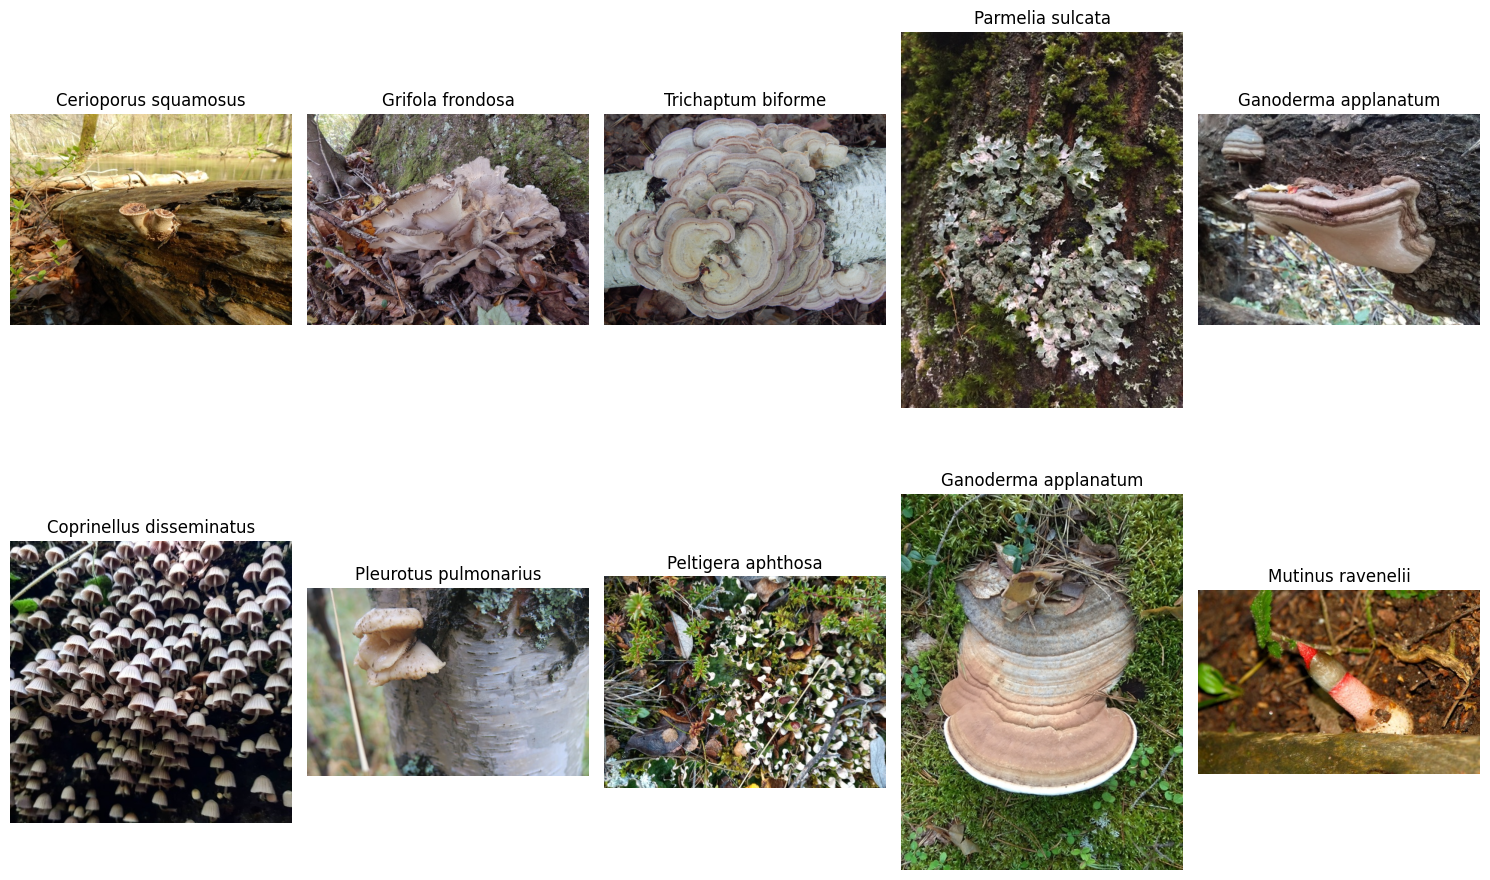

In [ ]:
# Set the path to directory
train_path = '/kaggle/input/mushroom1/merged_dataset'

# Get all image paths and their corresponding labels
image_paths = []
labels = []

for label in os.listdir(train_path):
    label_dir = os.path.join(train_path, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(image_path)
                labels.append(label)

# Randomly select 10 images
random_indices = random.sample(range(len(image_paths)), min(10, len(image_paths)))
selected_images = [image_paths[i] for i in random_indices]
selected_labels = [labels[i] for i in random_indices]

# Plot the images
plt.figure(figsize=(15, 10))
for i, (image_path, label) in enumerate(zip(selected_images, selected_labels)):
    plt.subplot(2, 5, i + 1)
    try:
        img = imread(image_path)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

plt.tight_layout()
plt.show()

In [ ]:
# Set directory path
train_path = "/kaggle/input/mushroom1/merged_dataset"

# Set parameters
batch_size = 32
img_height = 224
img_width = 224
validation_split = 0.2
seed = 42

# Create training dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create validation dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Print class names
class_names = train_data.class_names
print("Class names:", class_names)

# Configure datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

Found 104088 files belonging to 169 classes.
Using 83271 files for training.
Found 104088 files belonging to 169 classes.
Using 20817 files for validation.
Class names: ['Agaricus augustus', 'Agaricus xanthodermus', 'Amanita amerirubescens', 'Amanita augusta', 'Amanita brunnescens', 'Amanita calyptroderma', 'Amanita citrina', 'Amanita flavoconia', 'Amanita muscaria', 'Amanita pantherina', 'Amanita persicina', 'Amanita phalloides', 'Amanita rubescens', 'Amanita velosa', 'Apioperdon pyriforme', 'Armillaria borealis', 'Armillaria mellea', 'Armillaria tabescens', 'Artomyces pyxidatus', 'Bjerkandera adusta', 'Bolbitius titubans', 'Boletus edulis', 'Boletus pallidus', 'Boletus reticulatus', 'Boletus rex-veris', 'Calocera viscosa', 'Calycina citrina', 'Cantharellus californicus', 'Cantharellus cibarius', 'Cantharellus cinnabarinus', 'Cerioporus squamosus', 'Cetraria islandica', 'Chlorociboria aeruginascens', 'Chlorophyllum brunneum', 'Chlorophyllum molybdites', 'Chondrostereum purpureum', 'Cl

In [ ]:
# Record start time
start_time = time.time()

INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = 169
EPOCHS = 100

# Model Architecture
def create_model():
    inputs = tf.keras.Input(shape=INPUT_SHAPE)

    # Base CNN

    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Classifier
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    return tf.keras.Model(inputs, outputs)

model = create_model()

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Record end time and calculate duration
model_time = time.time() - start_time
print(f"\nTraining completed in {model_time:.2f} seconds")

Epoch 1/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 56s 15ms/step - accuracy: 0.1537 - loss: 4.1013 - val_accuracy: 0.3108 - val_loss: 2.9836 - learning_rate: 0.0010
Epoch 2/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.3186 - loss: 2.9317 - val_accuracy: 0.3856 - val_loss: 2.5655 - learning_rate: 0.0010
Epoch 3/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.3840 - loss: 2.5453 - val_accuracy: 0.4154 - val_loss: 2.4036 - learning_rate: 0.0010
Epoch 4/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.4254 - loss: 2.3167 - val_accuracy: 0.4236 - val_loss: 2.3880 - learning_rate: 0.0010
Epoch 5/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.4607 - loss: 2.1326 - val_accuracy: 0.4110 - val_loss: 2.4874 - learning_rate: 0.0010
Epoch 6/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.4918 - loss: 1.9824 - val_accuracy: 0.4021 - val_loss: 2.6102 - learning_rate: 0.0010
Epoch 7/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step -

In [ ]:
# Record start time
start_time = time.time()

INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = 169
EPOCHS = 100

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# Model Architecture

inputs = tf.keras.Input(shape=INPUT_SHAPE)

# Data augmentation
x = data_augmentation(inputs)

# Base CNN
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Classifier
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Train the model
history_2 = model_2.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=my_callbacks
)


# Record end time and calculate duration
model_time_2 = time.time() - start_time
print(f"\nTraining completed in {model_time_2:.2f} seconds")

Epoch 1/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.1558 - loss: 4.0881 - val_accuracy: 0.3033 - val_loss: 3.0256 - learning_rate: 0.0010
Epoch 2/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 0.3002 - loss: 3.0353 - val_accuracy: 0.3579 - val_loss: 2.7206 - learning_rate: 0.0010
Epoch 3/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.3520 - loss: 2.7309 - val_accuracy: 0.3639 - val_loss: 2.6338 - learning_rate: 0.0010
Epoch 4/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 60s 23ms/step - accuracy: 0.3815 - loss: 2.5654 - val_accuracy: 0.4230 - val_loss: 2.3682 - learning_rate: 0.0010
Epoch 5/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 64s 24ms/step - accuracy: 0.3996 - loss: 2.4577 - val_accuracy: 0.4401 - val_loss: 2.2890 - learning_rate: 0.0010
Epoch 6/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 69s 26ms/step - accuracy: 0.4137 - loss: 2.3865 - val_accuracy: 0.4467 - val_loss: 2.2441 - learning_rate: 0.0010
Epoch 7/100
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 53s 20ms/step -

In [ ]:
# Record start time
start_time = time.time()

# Constants
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 169
BATCH_SIZE = 32  # Adjust based on your GPU memory
EPOCHS = 20

# Data Augmentation (applied to train_dataset)
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    return image, label

# Apply augmentation to train dataset
train_dataset = train_data.map(
    augment_data,
    num_parallel_calls=tf.data.AUTOTUNE
)

# Prefetch and optimize datasets
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_data.prefetch(tf.data.AUTOTUNE)

# Load EfficientNetB0 base model
base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE
)
base_model.trainable = False  # Freeze base model

# Build model
inputs = tf.keras.Input(shape=INPUT_SHAPE)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, outputs)

# Compile
model_3.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
]

# Train the model
history_3 = model_3.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Record end time and calculate duration
model_time_3 = time.time() - start_time
print(f"\nTraining completed in {model_time_3:.2f} seconds")


Epoch 1/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 192s 62ms/step - accuracy: 0.4447 - loss: 2.4928 - val_accuracy: 0.6819 - val_loss: 1.2187 - learning_rate: 0.0010
Epoch 2/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.6432 - loss: 1.3340 - val_accuracy: 0.7141 - val_loss: 1.0640 - learning_rate: 0.0010
Epoch 3/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.6727 - loss: 1.2063 - val_accuracy: 0.7256 - val_loss: 1.0013 - learning_rate: 0.0010
Epoch 4/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.6811 - loss: 1.1494 - val_accuracy: 0.7309 - val_loss: 0.9676 - learning_rate: 0.0010
Epoch 5/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.6863 - loss: 1.1226 - val_accuracy: 0.7356 - val_loss: 0.9473 - learning_rate: 0.0010
Epoch 6/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accuracy: 0.6916 - loss: 1.1006 - val_accuracy: 0.7401 - val_loss: 0.9344 - learning_rate: 0.0010
Epoch 7/20
2603/2603 ━━━━━━━━━━━━━━━━━━━━ 50s 19ms/step - accur

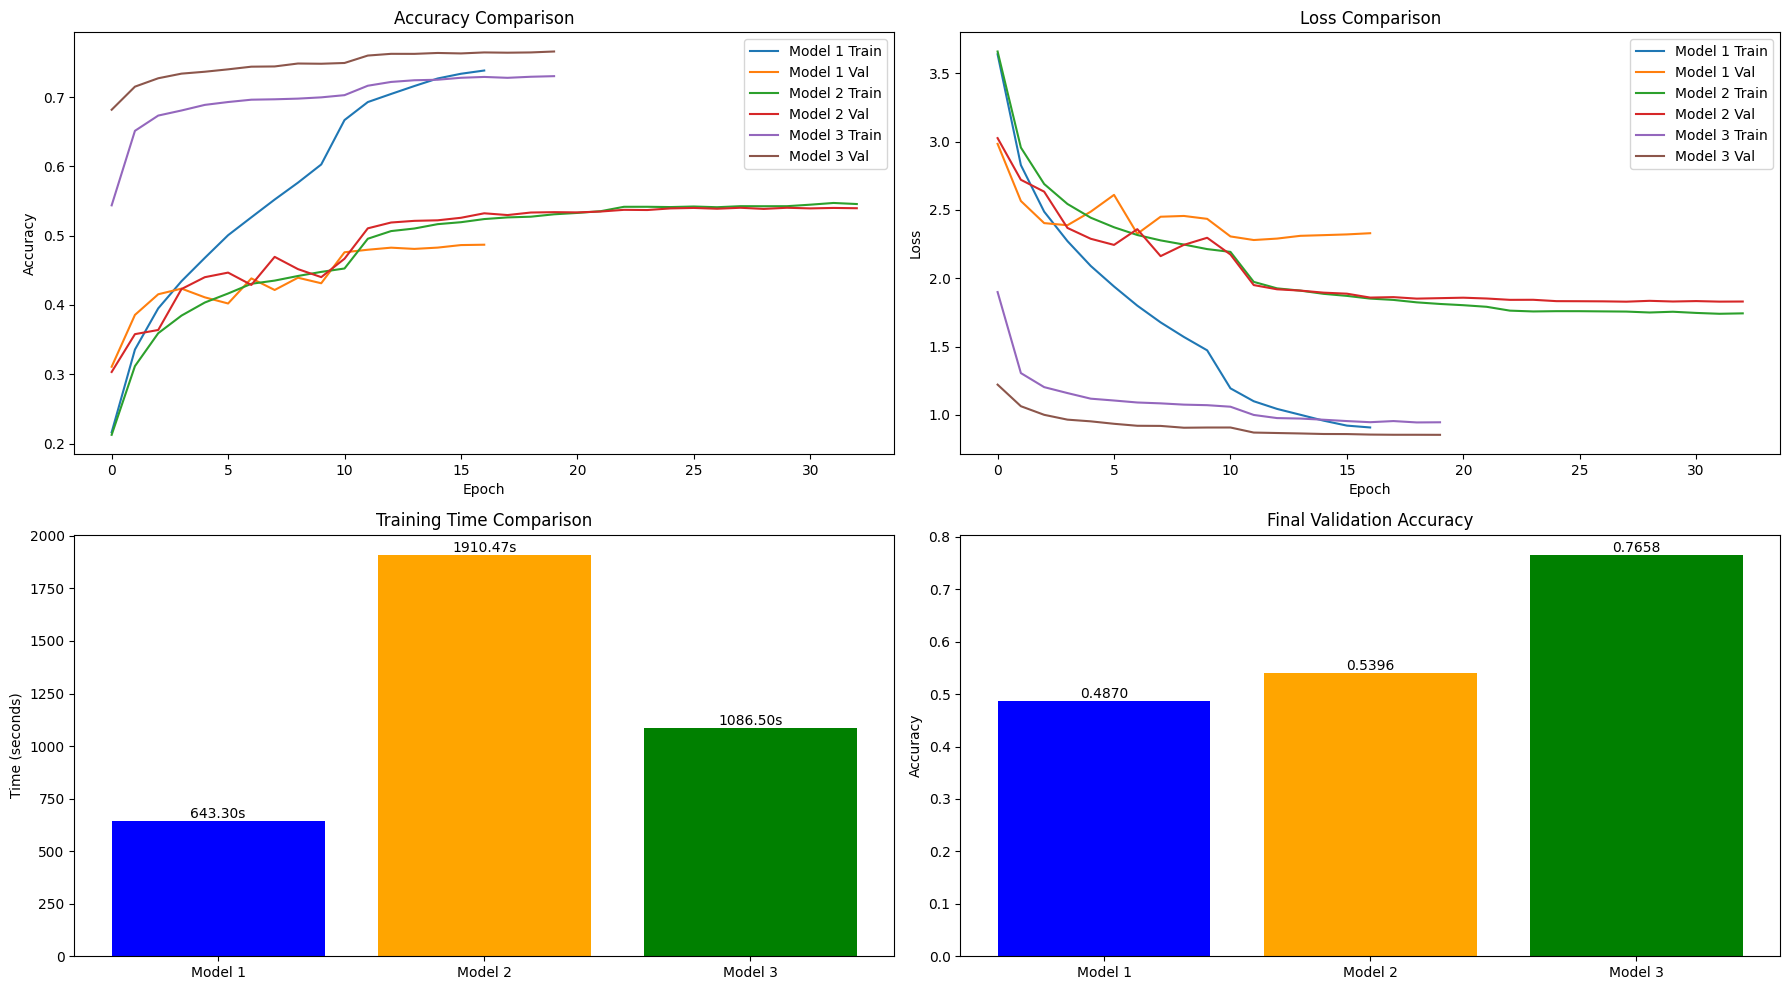

In [ ]:
# Set up the figure
plt.figure(figsize=(18, 10))

# Plot Accuracy Comparison
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Train')
plt.plot(history.history['val_accuracy'], label='Model 1 Val')
plt.plot(history_2.history['accuracy'], label='Model 2 Train')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Val')
plt.plot(history_3.history['accuracy'], label='Model 3 Train')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Val')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Model 1 Train')
plt.plot(history.history['val_loss'], label='Model 1 Val')
plt.plot(history_2.history['loss'], label='Model 2 Train')
plt.plot(history_2.history['val_loss'], label='Model 2 Val')
plt.plot(history_3.history['loss'], label='Model 3 Train')
plt.plot(history_3.history['val_loss'], label='Model 3 Val')
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot Training Time Comparison
plt.subplot(2, 2, 3)
models = ['Model 1', 'Model 2', 'Model 3']
times = [model_time, model_time_2, model_time_3]
bars = plt.bar(models, times, color=['blue', 'orange', 'green'])

# Add time labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}s',
             ha='center', va='bottom')

plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')

# Plot Final Validation Accuracy Comparison
plt.subplot(2, 2, 4)
val_accs = [
    history.history['val_accuracy'][-1],
    history_2.history['val_accuracy'][-1],
    history_3.history['val_accuracy'][-1]
]
bars = plt.bar(models, val_accs, color=['blue', 'orange', 'green'])

# Add accuracy labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('Final Validation Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()